In [ ]:
import numpy as np
import sortingx as sx

sizes = [2**i for i in range(4, 25)]
random_arrays = {}
for size in sizes:
    random_arrays[size] = np.random.randint(0, size, size=size)
algorithms = [
    sx.shell,
    sx.heap,
    sx.quick,
    sx.merge,
]
import time
import pandas as pd
from tqdm import tqdm

results = []
for size, arr in tqdm(random_arrays.items(), desc=f'Array sizes {size:,}'):
    for algo in algorithms:
        test_arr = arr.copy()
        start_time = time.time()
        algo(test_arr)
        end_time = time.time()
        results.append({
            'algorithm': algo.__name__,
            'array_size': size,
            'time_seconds': end_time - start_time
        })
df_results = pd.DataFrame(results)
print("Generated arrays of sizes:", list(random_arrays.keys()))

Generated arrays of sizes: [16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144, 524288, 1048576, 2097152, 4194304, 8388608, 16777216]


And plot it again:

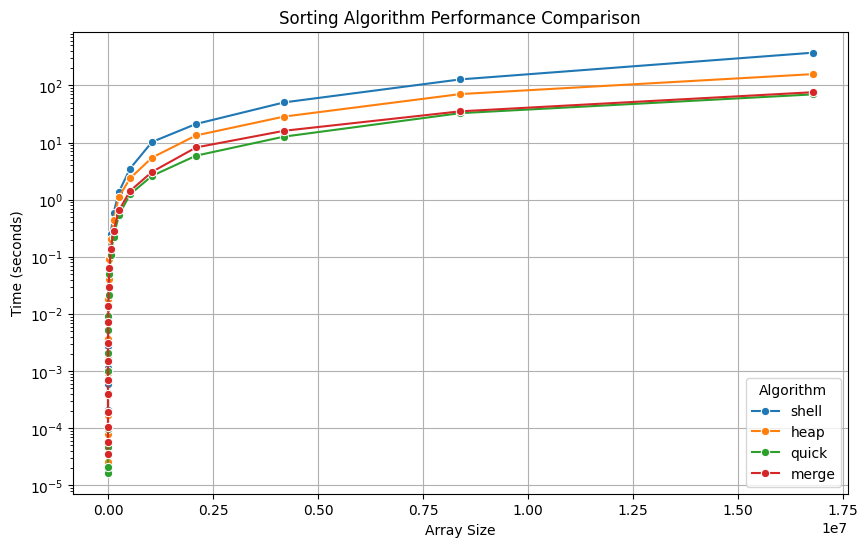

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_results, x='array_size', y='time_seconds', hue='algorithm', marker='o')

plt.title('Sorting Algorithm Performance Comparison')
plt.xlabel('Array Size')
plt.ylabel('Time (seconds)')
plt.yscale('log')
plt.grid(True)
plt.legend(title='Algorithm')

plt.show()
